In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


results_df = pd.read_csv('/content/results.csv')

#  Filter for races where a driver started from pole position (grid == 1)
pole_position_df = results_df[results_df['grid'] == 1][['raceId', 'driverId']]

#  Filter for races where a driver finished in the first position (positionOrder == 1)
race_winners_df = results_df[results_df['positionOrder'] == 1][['raceId', 'driverId', 'grid']]


print("Drivers on Pole Position:")
print(pole_position_df)


print("\nRace Winners with Grid Position:")
print(race_winners_df)


# Calculate winning percentages
total_wins=len(race_winners_df)

total_pole_positions = len(pole_position_df)

pole_position_wins = len(race_winners_df[race_winners_df['grid'] == 1])

wins_any_grid_position= total_wins-pole_position_wins

pole_position_win_percentage = (pole_position_wins / total_pole_positions) * 100


prob_win_from_pole=pole_position_wins/total_wins

prob_win_from_any=wins_any_grid_position/total_wins

print(f"Total Pole Positions: {total_pole_positions}")
print(f"Pole Position Wins: {pole_position_wins}")
print(f"Win Percentage from Pole Position: {pole_position_win_percentage:.2f}%")


# bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Pole Position', 'Any Position'], [prob_win_from_pole, prob_win_from_any], color=['blue', 'green'])
plt.title('Probability of Winning a Race')
plt.xlabel('Starting Position')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.show()


# pie chart
labels = ['Pole Position', 'Other Positions']
sizes = [prob_win_from_pole, 1 - prob_win_from_pole]
colors = ['blue', 'lightgray']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Probability of Winning a Race')
plt.axis('equal')
plt.show()

Contingency Table:
positionOrder  False  True 
grid                       
False          24755    640
True             648    476

Expected Frequencies:
              True          False
Expected  47.301331  24326.301331

Chi-square Test Statistic:
Chi-square statistic: 4225.6967
P-value: 0.0000


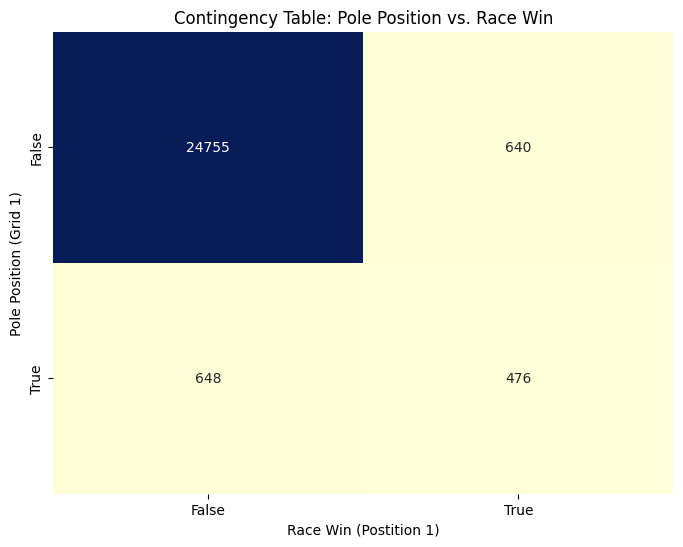

In [ ]:
# Chi-Square Test of Independence




contingency_table = pd.crosstab(results_df['grid'] == 1, results_df['positionOrder'] == 1)

print("Contingency Table:")
print(contingency_table)
# Calculate expected frequencies (assuming null hypothesis: no association)
expected = pd.DataFrame({
    True: [contingency_table.sum(axis=1)[True] * contingency_table.sum(axis=0)[True] / contingency_table.sum().sum()],
    False: [contingency_table.sum(axis=1)[False] * contingency_table.sum(axis=0)[False] / contingency_table.sum().sum()]
}, index=['Expected'])

print("\nExpected Frequencies:")
print(expected)
from scipy.stats import chi2_contingency


observed = contingency_table.values

chi2, p, dof, expected = chi2_contingency(observed)

print("\nChi-square Test Statistic:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", cbar=False, fmt='d')
plt.title('Contingency Table: Pole Position vs. Race Win')
plt.xlabel('Race Win (Postition 1)')
plt.ylabel('Pole Position (Grid 1)')
plt.show()

H0:ther is no assosciation between starting the race in pole position
H1:There is an association between starting from pole position and winning the race.


after doing the  Chi-Square Test of Independence the NUll hypothesis was rejected and it was found that there is indeed a significant association between starting from pole position and winning races.
